In [ ]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

# versions
print(f'numpy:{np.__version__}\npandas:{pd.__version__}')

numpy:1.22.4
pandas:1.5.3


In [ ]:
class Perceptron:

    def __init__(self, learning_rate=0.1, epochs=100):
        self.weights = None
        self.bias = None
        self.learning_rate = learning_rate
        self.epochs = epochs


    def activation(self, z):   
        return np.heaviside(z, 0) # haviside(z) heaviside -> activation


    def fit(self, X, y):     
        n_features = X.shape[1]
        
        # Initializing weights and bias
        self.weights = np.zeros((n_features))
        self.bias = 0
        
        # Iterating until the number of epochs
        for epoch in range(self.epochs):
            
            # Traversing through the entire training set
            for i in range(len(X)):
                z = np.dot(X, self.weights) + self.bias # Finding the dot product and adding the bias
                y_pred = self.activation(z) # Passing through an activation function
                
                #Updating weights and bias
                self.weights += self.learning_rate * (y[i] - y_pred[i]) * X[i]
                self.bias += self.learning_rate * (y[i] - y_pred[i])
                
        return self.weights, self.bias


    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        return self.activation(z)     

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()  # Loading the dataset iris

print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:
iris = pd.DataFrame(
    data= np.c_[iris['data'], iris['target']],
    columns= iris['feature_names'] + ['target']
    )

iris.head(5)  # first 5 instances (rows)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
species = []

for i in range(len(iris['target'])):
    if iris['target'][i] == 0:
        species.append("setosa")
    elif iris['target'][i] == 1:
        species.append('versicolor')
    else:
        species.append('virginica')


iris['species'] = species

In [ ]:
iris.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [ ]:
iris.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [ ]:
iris.describe(include = 'all')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,1.000000,NaN
std,0.828066,0.435866,1.765298,0.762238,0.819232,NaN
min,4.300000,2.000000,1.000000,0.100000,0.000000,NaN
25%,5.100000,2.800000,1.600000,0.300000,0.000000,NaN
50%,5.800000,3.000000,4.350000,1.300000,1.000000,NaN
75%,6.400000,3.300000,5.100000,1.800000,2.000000,NaN


In [ ]:
plt.style.use('dark_background')  # "dark" theme
plt.rcParams["font.size"] = 12

plt.rcParams["figure.figsize"] = (10, 4)

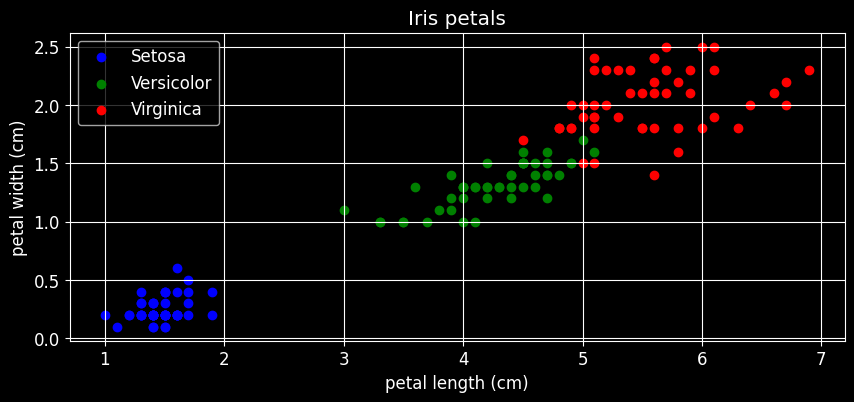

In [ ]:
setosa = iris[iris.species == "setosa"]
versicolor = iris[iris.species=='versicolor']
virginica = iris[iris.species=='virginica']

fig, ax = plt.subplots()

# labels and scatter points
ax.scatter(setosa['petal length (cm)'], setosa['petal width (cm)'], label="Setosa", facecolor="blue")
ax.scatter(versicolor['petal length (cm)'], versicolor['petal width (cm)'], label="Versicolor", facecolor="green")
ax.scatter(virginica['petal length (cm)'], virginica['petal width (cm)'], label="Virginica", facecolor="red")


ax.set_xlabel("petal length (cm)")
ax.set_ylabel("petal width (cm)")
ax.grid()
ax.set_title("Iris petals")
ax.legend()

plt.show();

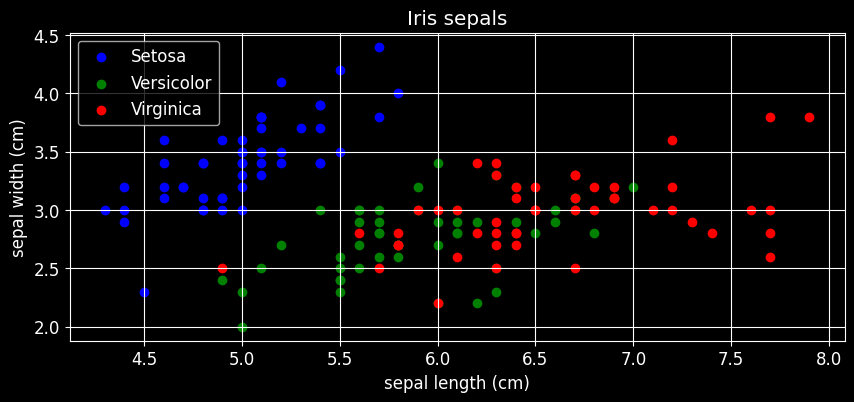

In [ ]:
fig, ax = plt.subplots()

# labels and scatter points
ax.scatter(setosa['sepal length (cm)'], setosa['sepal width (cm)'], label="Setosa", facecolor="blue")
ax.scatter(versicolor['sepal length (cm)'], versicolor['sepal width (cm)'], label="Versicolor", facecolor="green")
ax.scatter(virginica['sepal length (cm)'], virginica['sepal width (cm)'], label="Virginica", facecolor="red")


ax.set_xlabel("sepal length (cm)")
ax.set_ylabel("sepal width (cm)")
ax.grid()
ax.set_title("Iris sepals")
ax.legend()

plt.show();

In [ ]:
X = iris.drop(columns = ['target', 'species'], axis=1)
X.describe(include = 'all')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
X = X.to_numpy()[:, (2, 3)]  # 3rd and 4th columns
y = iris['target'].to_numpy().astype(int)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f'Training: {len(X_train)} instances \nTest: {len(X_test)} instances')

print(f'\nTraining shape:{X_train.shape} \nFirst row:{X_train[0]}')
print(f'\nTest shape:{X_test.shape} \nFirst row:{X_test[0]}')

print(f'\nLabels \n\ttraining: {len(y_train)} instances \n\ttest: {len(y_test)} instances')
print(f'\nLabels training shape:{y_train.shape} \nset:{y_train}')
print(f'\nLabels test shape:{y_test.shape} \nset:{y_test}')

Training: 105 instances 
Test: 45 instances

Training shape:(105, 2) 
First row:[3.7 1. ]

Test shape:(45, 2) 
First row:[4.7 1.2]

Labels 
	training: 105 instances 
	test: 45 instances

Labels training shape:(105,) 
set:[1 2 2 1 2 1 2 1 0 2 1 0 0 0 1 2 0 0 0 1 0 1 2 0 1 2 0 2 2 1 1 2 1 0 1 2 0
 0 1 1 0 2 0 0 1 1 2 1 2 2 1 0 0 2 2 0 0 0 1 2 0 2 2 0 1 1 2 1 2 0 2 1 2 1
 1 1 0 1 1 0 1 2 2 0 1 2 2 0 2 0 1 2 2 1 2 1 1 2 2 0 1 2 0 1 2]

Labels test shape:(45,) 
set:[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]


In [ ]:
perceptron = Perceptron(0.001, 100)

perceptron.fit(X_train, y_train)

(array([15.9837,  6.651 ]), 0.6010000000000004)

In [ ]:
pred = perceptron.predict(X_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

# Accuracy
acc = accuracy_score(pred, y_test)
print(f'Accuracy:{acc:.2f}')

# Confusion matrix
print(metrics.confusion_matrix(y_test, pred))

Accuracy:0.29
[[ 0 19  0]
 [ 0 13  0]
 [ 0 13  0]]


In [ ]:
perceptron = Perceptron(0.001, 1000)

perceptron.fit(X_train, y_train)

pred = perceptron.predict(X_test)

# Accuracy
acc = accuracy_score(pred, y_test)
print(f'Accuracy:{acc:.2f}')

# Confusion matrix
print(metrics.confusion_matrix(y_test, pred))

Accuracy:0.29
[[ 0 19  0]
 [ 0 13  0]
 [ 0 13  0]]


In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f'Training: {len(X_train)} instances \nTest: {len(X_test)} instances')

print(f'\nTraining shape:{X_train.shape} \nFirst row:{X_train[0]}')
print(f'\nTest shape:{X_test.shape} \nFirst row:{X_test[0]}')

print(f'\nLabels \n\ttraining: {len(y_train)} instances \n\ttest: {len(y_test)} instances')
print(f'\nLabels training shape:{y_train.shape} \nset:{y_train}')
print(f'\nLabels test shape:{y_test.shape} \nset:{y_test}')

Training: 105 instances 
Test: 45 instances

Training shape:(105, 2) 
First row:[-0.09951105 -0.32339776]

Test shape:(45, 2) 
First row:[ 0.484213   -0.05282593]

Labels 
	training: 105 instances 
	test: 45 instances

Labels training shape:(105,) 
set:[1 2 2 1 2 1 2 1 0 2 1 0 0 0 1 2 0 0 0 1 0 1 2 0 1 2 0 2 2 1 1 2 1 0 1 2 0
 0 1 1 0 2 0 0 1 1 2 1 2 2 1 0 0 2 2 0 0 0 1 2 0 2 2 0 1 1 2 1 2 0 2 1 2 1
 1 1 0 1 1 0 1 2 2 0 1 2 2 0 2 0 1 2 2 1 2 1 1 2 2 0 1 2 0 1 2]

Labels test shape:(45,) 
set:[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]


In [ ]:
perceptron = Perceptron(0.001, 100)

perceptron.fit(X_train, y_train)

pred = perceptron.predict(X_test)

# Accuracy
acc = accuracy_score(pred, y_test)
print(f'Accuracy:{acc:.2f}')

# Confusion matrix
print(metrics.confusion_matrix(y_test, pred))

Accuracy:0.71
[[19  0  0]
 [ 0 13  0]
 [ 0 13  0]]


In [ ]:
from sklearn import metrics

print("Precision, Recall, Confusion matrix, in testing\n")

# Precision Recall scores
print(metrics.classification_report(y_test, pred, digits=2))

# Confusion matrix
print(metrics.confusion_matrix(y_test, pred))

Precision, Recall, Confusion matrix, in testing

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.50      1.00      0.67        13
           2       0.00      0.00      0.00        13

    accuracy                           0.71        45
   macro avg       0.50      0.67      0.56        45
weighted avg       0.57      0.71      0.61        45

[[19  0  0]
 [ 0 13  0]
 [ 0 13  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


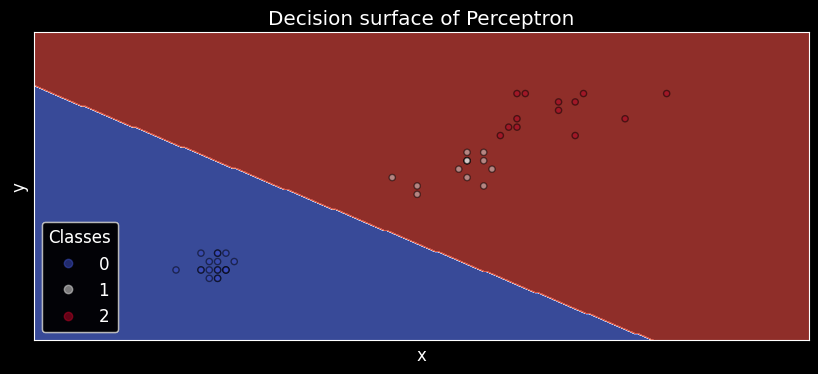

In [ ]:
def make_meshgrid(x, y, h=.02):     
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):  
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    out = ax.contourf(xx, yy, Z, **params)

    return out

fig, ax = plt.subplots()

title = 'Decision surface of Perceptron'

# Set-up grid for plotting

X0, X1 = X_test[:, 0], X_test[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, perceptron, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)

scatter = ax.scatter(X0, X1, c=y_test, cmap=plt.cm.coolwarm, s=20, edgecolors='k', alpha = 0.5)

ax.set_ylabel('y')
ax.set_xlabel('x')

ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)


plt.show()